# 将Intel和IBM公司近一年来每个月开票价的平均值绘制在一张图中

In [3]:
import requests
import re
import json
import pandas as pd
from datetime import date
import time
from pylab import *
from scipy.cluster.vq import *

In [17]:
def retrieve_quotes_historical(stock_code):
    quotes = []
    url = 'https://finance.yahoo.com/quote/%s/history?p=%s' % (stock_code, stock_code)
    r = requests.get(url)
    m = re.findall('"HistoricalPriceStore":{"prices":(.*?),"isPending"', r.text)
    if m:
        quotes = json.loads(m[0])
        quotes = quotes[::-1]
    return [item for item in quotes if not 'type' in item]

In [18]:
def create_aveg_open(stock_code):
    quotes = retrieve_quotes_historical(stock_code)
    list1 = []
    for i in range(len(quotes)):
        x = date.fromtimestamp(quotes[i]['date'])
        y = date.strftime(x, '%Y-%m-%d')
        list1.append(y)
    quotesdf_ori = pd.DataFrame(quotes, index=list1)
    listtemp = []
    for i in range(len(quotesdf_ori)):
        temp = time.strptime(quotesdf_ori.index[i],"%Y-%m-%d")
        listtemp.append(temp.tm_mon)
    tempdf = quotesdf_ori.copy()
    tempdf['month'] = listtemp
    meanopen = tempdf.groupby('month').open.mean()
    return meanopen

In [19]:
open1 = create_aveg_open('INTC')
open2 = create_aveg_open('IBM')

In [20]:
subplot(211)
plt.plot(open1.index, open1.values, color='r', marker='o')
subplot(212)
plt.plot(open1.index, open2.values, color='green', marker='o')

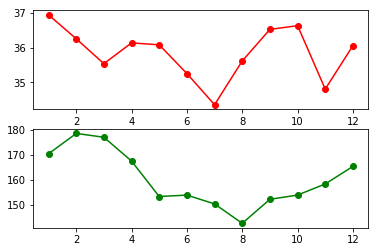

In [21]:
plt.show()